## response EDA

In [1]:
from pathlib import Path
import json

# try to locate the file in the repo (works for relative or absolute layouts)
candidates = list(Path.cwd().rglob("response_v4_9.json"))
if candidates:
    path = candidates[0]
else:
    path = Path("Causal_extractor/data_extract/output/response_v4_9.json")
if not path.exists():
    raise FileNotFoundError(f"response_v3.json not found. Checked: {path}")

with open(path, "r", encoding="utf-8") as f:
    data = json.load(f)

if not isinstance(data, list):
    raise ValueError("Expected JSON file to contain a list of records")

n = len(data)
keys = set().union(*(d.keys() for d in data))

na_indices = {k: [] for k in keys}
for i, rec in enumerate(data):
    for k in keys:
        v = rec.get(k, "")
        if isinstance(v, str) and v.strip() == "N/A":
            na_indices[k].append(i)

# print concise summary
for k in sorted(keys):
    cnt = len(na_indices[k])
    pct = 100 * cnt / n if n else 0
    print(f"{k}: {cnt}/{n} ({pct:.1f}%)  indices={na_indices[k]}")

explicit_type: 0/18 (0.0%)  indices=[]
marked_type: 6/18 (33.3%)  indices=[0, 10, 11, 12, 14, 17]
marker: 0/18 (0.0%)  indices=[]
object: 0/18 (0.0%)  indices=[]
pattern_type: 0/18 (0.0%)  indices=[]
relationship: 0/18 (0.0%)  indices=[]
sentence_type: 0/18 (0.0%)  indices=[]
source_text: 0/18 (0.0%)  indices=[]
subject: 0/18 (0.0%)  indices=[]


In [2]:
import pandas as pd
from IPython.display import display

# Convert loaded JSON list-of-dicts into a DataFrame and display as a table
df = pd.DataFrame(data)
print(f"Loaded {len(df)} rows, {len(df.columns)} columns")
# show a preview (adjust or remove .head to show more)
df

# To persist or inspect further:
# df.to_csv('response_v3_table_preview.csv', index=False)
# display(df)  # uncomment to render full table in the notebook

Loaded 18 rows, 9 columns


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,F,SB,N/A,E,Trash truck schedule -> Is agreed upon by Bang...,None,The truck schedule,Agreed upon by Bangkok and university,The schedule of the truck seems to be agreed o...
1,C,SB,M,E,Some event -> Causes an unusual amount of trash,causes,Some event,An unusual amount of trash,university staff will call for trash trucks on...
2,C,SB,U,E,An unusual amount of trash -> University staff...,None,An unusual amount of trash,University staff call for trash trucks,university staff will call for trash trucks on...
3,C,ES,M,E,Limited space in university -> Garbage buffer ...,due to,limited space in our university,the garbage buffer,"Also due to limited space in our university, t..."
4,C,SB,U,E,Storing trash in a buffer -> Prevents normal c...,None,Garbage buffer storing trash,Normal collection points overflowing,the garbage buffer is created to store trash p...
5,C,ES,U,I,Universities accept more students -> Challenge...,None,Universities accept more students,Challenges,And these challenges emerge as universities ac...
6,C,ES,U,E,Increase in the number of students -> Increase...,None,Increase in the number of students,The number of trash producers,Increase in the number of students also increa...
7,C,OT,U,E,The most important factor -> Makes the project...,None,The most important factor,The project in general fail,He mentions that the most important factor tha...
8,C,OT,U,E,Gains after employing developed policy -> Cons...,None,gains after employing developed policy,more monthly cost,Ex. gains after employing developed policy con...
9,C,OT,U,E,Gains after employing developed policy -> Give...,None,gains after employing developed policy,insignificant improvement,gains after employing developed policy... give...


In [3]:
from collections import defaultdict
import pandas as pd
from IPython.display import display

def show_grouped_rows_table(data, key, max_rows_per_group=None):
    groups = defaultdict(list)
    for rec in data:
        groups[rec.get(key, "")].append(rec)
    for val in sorted(groups.keys(), key=lambda x: str(x)):
        rows = groups[val]
        print(f'\n--- {key!r} = {val!r} ({len(rows)} rows) ---')
        if not rows:
            print("(no rows)")
            continue
        df = pd.DataFrame(rows)
        if max_rows_per_group is not None:
            display(df.head(max_rows_per_group))
        else:
            display(df)

# show rows grouped by explicit_type, marked_type, and object (rendered as tables)
show_grouped_rows_table(data, "explicit_type", max_rows_per_group=50)


--- 'explicit_type' = 'E' (12 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,F,SB,N/A,E,Trash truck schedule -> Is agreed upon by Bang...,None,The truck schedule,Agreed upon by Bangkok and university,The schedule of the truck seems to be agreed o...
1,C,SB,M,E,Some event -> Causes an unusual amount of trash,causes,Some event,An unusual amount of trash,university staff will call for trash trucks on...
2,C,SB,U,E,An unusual amount of trash -> University staff...,None,An unusual amount of trash,University staff call for trash trucks,university staff will call for trash trucks on...
3,C,ES,M,E,Limited space in university -> Garbage buffer ...,due to,limited space in our university,the garbage buffer,"Also due to limited space in our university, t..."
4,C,SB,U,E,Storing trash in a buffer -> Prevents normal c...,None,Garbage buffer storing trash,Normal collection points overflowing,the garbage buffer is created to store trash p...
5,C,ES,U,E,Increase in the number of students -> Increase...,None,Increase in the number of students,The number of trash producers,Increase in the number of students also increa...
6,C,OT,U,E,The most important factor -> Makes the project...,None,The most important factor,The project in general fail,He mentions that the most important factor tha...
7,C,OT,U,E,Gains after employing developed policy -> Cons...,None,gains after employing developed policy,more monthly cost,Ex. gains after employing developed policy con...
8,C,OT,U,E,Gains after employing developed policy -> Give...,None,gains after employing developed policy,insignificant improvement,gains after employing developed policy... give...
9,A,SP,N/A,E,We -> may need to include financial factor and...,None,We,financial factor and staff sentiment,We may need to include financial factor and st...



--- 'explicit_type' = 'I' (6 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,ES,U,I,Universities accept more students -> Challenge...,None,Universities accept more students,Challenges,And these challenges emerge as universities ac...
1,A,SB,N/A,I,University -> calls BMA to collect garbage on ...,None,University,BMA (Bangkok Metropolitan Administration),ถ้าขยะเยอะเกิน -> โทรเรียกกทมมาเก็บตาม case
2,F,ES,N/A,I,Number of people in the university -> Increases,None,Number of people in the university,Increase,ปริมาณคนที่มหาลัยเพิ่ม/หน้าที่ของแต่ละคน
3,C,SP,U,I,Management -> Policy changes,None,Management (ผู้บริหาร),Policy,นโยบายเปลี่ยนตามผู้บริหาร
4,F,SB,N/A,I,Housekeepers -> Collect waste from buildings,None,Housekeepers (แม่บ้าน),Waste from buildings,ภายใน = อาคาร รวมโดยแม่บ้าน -> แม่บ้านแยก -> ใ...
5,C,SB,U,I,Staff working hours overlap with housekeeper w...,None,"Staff working hours, Housekeeper working hours",Garbage overflowing,"พนักงานเก็บขยะ 3-4pm(เลิก 5pm), แม่บ้านเก็บ 5p..."


In [4]:
show_grouped_rows_table(data, "marked_type", max_rows_per_group=50)



--- 'marked_type' = 'M' (3 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,SB,M,E,Some event -> Causes an unusual amount of trash,causes,Some event,An unusual amount of trash,university staff will call for trash trucks on...
1,C,ES,M,E,Limited space in university -> Garbage buffer ...,due to,limited space in our university,the garbage buffer,"Also due to limited space in our university, t..."
2,C,SB,M,E,Personnel -> Inaccurate weight measurements,เนื่องจาก,Personnel (บุคลากร),Inaccurate weight measurements (การคาดเคลื่อนก...,ปัญหา 1 -> การคาดเคลื่อนการชั่งน้ำหนักเนื่องจา...



--- 'marked_type' = 'N/A' (6 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,F,SB,N/A,E,Trash truck schedule -> Is agreed upon by Bang...,None,The truck schedule,Agreed upon by Bangkok and university,The schedule of the truck seems to be agreed o...
1,A,SP,N/A,E,We -> may need to include financial factor and...,None,We,financial factor and staff sentiment,We may need to include financial factor and st...
2,A,SB,N/A,I,University -> calls BMA to collect garbage on ...,None,University,BMA (Bangkok Metropolitan Administration),ถ้าขยะเยอะเกิน -> โทรเรียกกทมมาเก็บตาม case
3,F,ES,N/A,I,Number of people in the university -> Increases,None,Number of people in the university,Increase,ปริมาณคนที่มหาลัยเพิ่ม/หน้าที่ของแต่ละคน
4,F,SB,N/A,I,Housekeepers -> Collect waste from buildings,None,Housekeepers (แม่บ้าน),Waste from buildings,ภายใน = อาคาร รวมโดยแม่บ้าน -> แม่บ้านแยก -> ใ...
5,F,SB,N/A,E,Waste collection cage size -> Is too small,None,Waste collection cage size,Too small,ปัญหา 2 ขนาดกรงรวมขยะเล็กไป



--- 'marked_type' = 'U' (9 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,SB,U,E,An unusual amount of trash -> University staff...,None,An unusual amount of trash,University staff call for trash trucks,university staff will call for trash trucks on...
1,C,SB,U,E,Storing trash in a buffer -> Prevents normal c...,None,Garbage buffer storing trash,Normal collection points overflowing,the garbage buffer is created to store trash p...
2,C,ES,U,I,Universities accept more students -> Challenge...,None,Universities accept more students,Challenges,And these challenges emerge as universities ac...
3,C,ES,U,E,Increase in the number of students -> Increase...,None,Increase in the number of students,The number of trash producers,Increase in the number of students also increa...
4,C,OT,U,E,The most important factor -> Makes the project...,None,The most important factor,The project in general fail,He mentions that the most important factor tha...
5,C,OT,U,E,Gains after employing developed policy -> Cons...,None,gains after employing developed policy,more monthly cost,Ex. gains after employing developed policy con...
6,C,OT,U,E,Gains after employing developed policy -> Give...,None,gains after employing developed policy,insignificant improvement,gains after employing developed policy... give...
7,C,SP,U,I,Management -> Policy changes,None,Management (ผู้บริหาร),Policy,นโยบายเปลี่ยนตามผู้บริหาร
8,C,SB,U,I,Staff working hours overlap with housekeeper w...,None,"Staff working hours, Housekeeper working hours",Garbage overflowing,"พนักงานเก็บขยะ 3-4pm(เลิก 5pm), แม่บ้านเก็บ 5p..."


In [5]:
show_grouped_rows_table(data, "object", max_rows_per_group=50)


--- 'object' = 'Agreed upon by Bangkok and university' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,F,SB,N/A,E,Trash truck schedule -> Is agreed upon by Bang...,None,The truck schedule,Agreed upon by Bangkok and university,The schedule of the truck seems to be agreed o...



--- 'object' = 'An unusual amount of trash' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,SB,M,E,Some event -> Causes an unusual amount of trash,causes,Some event,An unusual amount of trash,university staff will call for trash trucks on...



--- 'object' = 'BMA (Bangkok Metropolitan Administration)' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,A,SB,N/A,I,University -> calls BMA to collect garbage on ...,None,University,BMA (Bangkok Metropolitan Administration),ถ้าขยะเยอะเกิน -> โทรเรียกกทมมาเก็บตาม case



--- 'object' = 'Challenges' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,ES,U,I,Universities accept more students -> Challenge...,None,Universities accept more students,Challenges,And these challenges emerge as universities ac...



--- 'object' = 'Garbage overflowing' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,SB,U,I,Staff working hours overlap with housekeeper w...,None,"Staff working hours, Housekeeper working hours",Garbage overflowing,"พนักงานเก็บขยะ 3-4pm(เลิก 5pm), แม่บ้านเก็บ 5p..."



--- 'object' = 'Inaccurate weight measurements (การคาดเคลื่อนการชั่งน้ำหนัก)' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,SB,M,E,Personnel -> Inaccurate weight measurements,เนื่องจาก,Personnel (บุคลากร),Inaccurate weight measurements (การคาดเคลื่อนก...,ปัญหา 1 -> การคาดเคลื่อนการชั่งน้ำหนักเนื่องจา...



--- 'object' = 'Increase' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,F,ES,N/A,I,Number of people in the university -> Increases,None,Number of people in the university,Increase,ปริมาณคนที่มหาลัยเพิ่ม/หน้าที่ของแต่ละคน



--- 'object' = 'Normal collection points overflowing' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,SB,U,E,Storing trash in a buffer -> Prevents normal c...,None,Garbage buffer storing trash,Normal collection points overflowing,the garbage buffer is created to store trash p...



--- 'object' = 'Policy' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,SP,U,I,Management -> Policy changes,None,Management (ผู้บริหาร),Policy,นโยบายเปลี่ยนตามผู้บริหาร



--- 'object' = 'The number of trash producers' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,ES,U,E,Increase in the number of students -> Increase...,None,Increase in the number of students,The number of trash producers,Increase in the number of students also increa...



--- 'object' = 'The project in general fail' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,OT,U,E,The most important factor -> Makes the project...,None,The most important factor,The project in general fail,He mentions that the most important factor tha...



--- 'object' = 'Too small' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,F,SB,N/A,E,Waste collection cage size -> Is too small,None,Waste collection cage size,Too small,ปัญหา 2 ขนาดกรงรวมขยะเล็กไป



--- 'object' = 'University staff call for trash trucks' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,SB,U,E,An unusual amount of trash -> University staff...,None,An unusual amount of trash,University staff call for trash trucks,university staff will call for trash trucks on...



--- 'object' = 'Waste from buildings' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,F,SB,N/A,I,Housekeepers -> Collect waste from buildings,None,Housekeepers (แม่บ้าน),Waste from buildings,ภายใน = อาคาร รวมโดยแม่บ้าน -> แม่บ้านแยก -> ใ...



--- 'object' = 'financial factor and staff sentiment' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,A,SP,N/A,E,We -> may need to include financial factor and...,None,We,financial factor and staff sentiment,We may need to include financial factor and st...



--- 'object' = 'insignificant improvement' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,OT,U,E,Gains after employing developed policy -> Give...,None,gains after employing developed policy,insignificant improvement,gains after employing developed policy... give...



--- 'object' = 'more monthly cost' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,OT,U,E,Gains after employing developed policy -> Cons...,None,gains after employing developed policy,more monthly cost,Ex. gains after employing developed policy con...



--- 'object' = 'the garbage buffer' (1 rows) ---


,pattern_type,sentence_type,marked_type,explicit_type,relationship,marker,subject,object,source_text
0,C,ES,M,E,Limited space in university -> Garbage buffer ...,due to,limited space in our university,the garbage buffer,"Also due to limited space in our university, t..."


## Score

In [6]:
from pathlib import Path
import json
import pandas as pd
import numpy as np

# Load validation scores
scores_path = Path("output/validation_scores.json")
if not scores_path.exists():
    scores_path = Path("Causal_extractor/data_extract/output/validation_scores.json")

with open(scores_path, "r", encoding="utf-8") as f:
    validation_data = json.load(f)

# Extract all 4 matrix scores across all files
all_sf = []  # Semantic Fidelity
all_sa = []  # Schema Accuracy
all_ea = []  # Explicit Accuracy
all_si = []  # Structural Integrity

file_stats = {}

for file_name, items in validation_data.items():
    file_sf, file_sa, file_ea, file_si = [], [], [], []
    
    for item_id, item_data in items.items():
        sf = int(item_data.get("semantic_fidelity", 0)) if item_data.get("semantic_fidelity") else 0
        sa = int(item_data.get("schema_accuracy", 0)) if item_data.get("schema_accuracy") else 0
        ea = int(item_data.get("explicit_accuracy", 0)) if item_data.get("explicit_accuracy") else 0
        si = int(item_data.get("structural_integrity", 0)) if item_data.get("structural_integrity") else 0
        
        all_sf.append(sf)
        all_sa.append(sa)
        all_ea.append(ea)
        all_si.append(si)
        
        file_sf.append(sf)
        file_sa.append(sa)
        file_ea.append(ea)
        file_si.append(si)
    
    if file_sf:
        file_stats[file_name] = {
            "SF_mean": np.mean(file_sf),
            "SF_std": np.std(file_sf),
            "SA_mean": np.mean(file_sa),
            "SA_std": np.std(file_sa),
            "EA_mean": np.mean(file_ea),
            "EA_std": np.std(file_ea),
            "SI_mean": np.mean(file_si),
            "SI_std": np.std(file_si),
        }

# Overall statistics
print("=" * 80)
print("📊 VALIDATION SCORES STATISTICS (4-MATRIX SYSTEM)")
print("=" * 80)

matrices = {
    "🎯 Semantic Fidelity (SF)": all_sf,
    "📊 Schema Accuracy (SA)": all_sa,
    "🔍 Explicit Accuracy (EA)": all_ea,
    "🔗 Structural Integrity (SI)": all_si
}

for matrix_name, scores in matrices.items():
    if scores:
        print(f"\n{matrix_name}:")
        print(f"   n={len(scores)}")
        print(f"   Mean:   {np.mean(scores):.2f}")
        print(f"   Median: {np.median(scores):.2f}")
        print(f"   Std:    {np.std(scores):.2f}")
        print(f"   Min:    {min(scores)}")
        print(f"   Max:    {max(scores)}")
        
        # Score distribution
        score_counts = pd.Series(scores).value_counts().sort_index()
        for score, count in score_counts.items():
            pct = 100 * count / len(scores)
            bar = "█" * int(pct / 2)
            print(f"      {score}: {count:3d} ({pct:5.1f}%) {bar}")

# Per-file statistics
if file_stats:
    print(f"\n📁 Per-File Statistics:")
    stats_df = pd.DataFrame(file_stats).T
    stats_df = stats_df.round(2)
    display(stats_df)
else:
    print("No validation scores found.")

📊 VALIDATION SCORES STATISTICS (4-MATRIX SYSTEM)

🎯 Semantic Fidelity (SF):
   n=18
   Mean:   4.22
   Median: 5.00
   Std:    1.51
   Min:    1
   Max:    5
      1:   3 ( 16.7%) ████████
      3:   1 (  5.6%) ██
      5:  14 ( 77.8%) ██████████████████████████████████████

📊 Schema Accuracy (SA):
   n=18
   Mean:   4.89
   Median: 5.00
   Std:    0.46
   Min:    3
   Max:    5
      3:   1 (  5.6%) ██
      5:  17 ( 94.4%) ███████████████████████████████████████████████

🔍 Explicit Accuracy (EA):
   n=18
   Mean:   4.89
   Median: 5.00
   Std:    0.46
   Min:    3
   Max:    5
      3:   1 (  5.6%) ██
      5:  17 ( 94.4%) ███████████████████████████████████████████████

🔗 Structural Integrity (SI):
   n=18
   Mean:   4.22
   Median: 5.00
   Std:    1.40
   Min:    1
   Max:    5
      1:   2 ( 11.1%) █████
      2:   1 (  5.6%) ██
      3:   1 (  5.6%) ██
      4:   1 (  5.6%) ██
      5:  13 ( 72.2%) ████████████████████████████████████

📁 Per-File Statistics:


,SF_mean,SF_std,SA_mean,SA_std,EA_mean,EA_std,SI_mean,SI_std
response_v4_9.json,4.22,1.51,4.89,0.46,4.89,0.46,4.22,1.4


In [7]:
# Print validation notes with full response row - only when notes are not empty
print("=" * 80)
print("📝 ITEMS WITH NOTES")
print("=" * 80)

items_with_notes = [(item_id, meta) for item_id, meta in items.items() 
                    if meta.get("notes", "").strip()]

if not items_with_notes:
    print("\n✅ No items have notes.")
else:
    print(f"\n Found {len(items_with_notes)} items with notes:\n")
    
    for item_id, meta in items_with_notes:
        idx = int(item_id)
        sf = meta.get("semantic_fidelity", "—")
        sa = meta.get("schema_accuracy", "—")
        ea = meta.get("explicit_accuracy", "—")
        si = meta.get("structural_integrity", "—")
        notes = meta.get("notes", "")
        row = df.loc[idx]
        
        print("─" * 80)
        print(f"📍 Index: {idx}  │  🎯 SF:{sf} | 📊 SA:{sa} | 🔍 EA:{ea} | 🔗 SI:{si}")
        print("─" * 80)
        print(f"📋 Notes: {notes}")
        print()
        print("📄 Response Details:")
        print(f"   • Subject:      {row.get('subject', 'N/A')}")
        print(f"   • Object:       {row.get('object', 'N/A')}")
        print(f"   • Relationship: {row.get('relationship', 'N/A')}")
        print(f"   • Marker:       {row.get('marker', 'N/A')}")
        print(f"   • Pattern:      {row.get('pattern_type', 'N/A')}")
        print(f"   • Marked Type:  {row.get('marked_type', 'N/A')}")
        print(f"   • Source Text:  {row.get('source_text', 'N/A')[:100]}...")
        print()

print("=" * 80)

📝 ITEMS WITH NOTES

 Found 9 items with notes:

────────────────────────────────────────────────────────────────────────────────
📍 Index: 2  │  🎯 SF:5 | 📊 SA:5 | 🔍 EA:5 | 🔗 SI:5
────────────────────────────────────────────────────────────────────────────────
📋 Notes: unmarked, when

📄 Response Details:
   • Subject:      An unusual amount of trash
   • Object:       University staff call for trash trucks
   • Relationship: An unusual amount of trash -> University staff call for trash trucks
   • Marker:       None
   • Pattern:      C
   • Marked Type:  U
   • Source Text:  university staff will call for trash trucks only when there is some event that causes an unusual amo...

────────────────────────────────────────────────────────────────────────────────
📍 Index: 5  │  🎯 SF:5 | 📊 SA:5 | 🔍 EA:5 | 🔗 SI:4
────────────────────────────────────────────────────────────────────────────────
📋 Notes: the "challenge" can be found in "event that causes an unusual amount of trash", but the input 

In [8]:
!pip install matplotlib

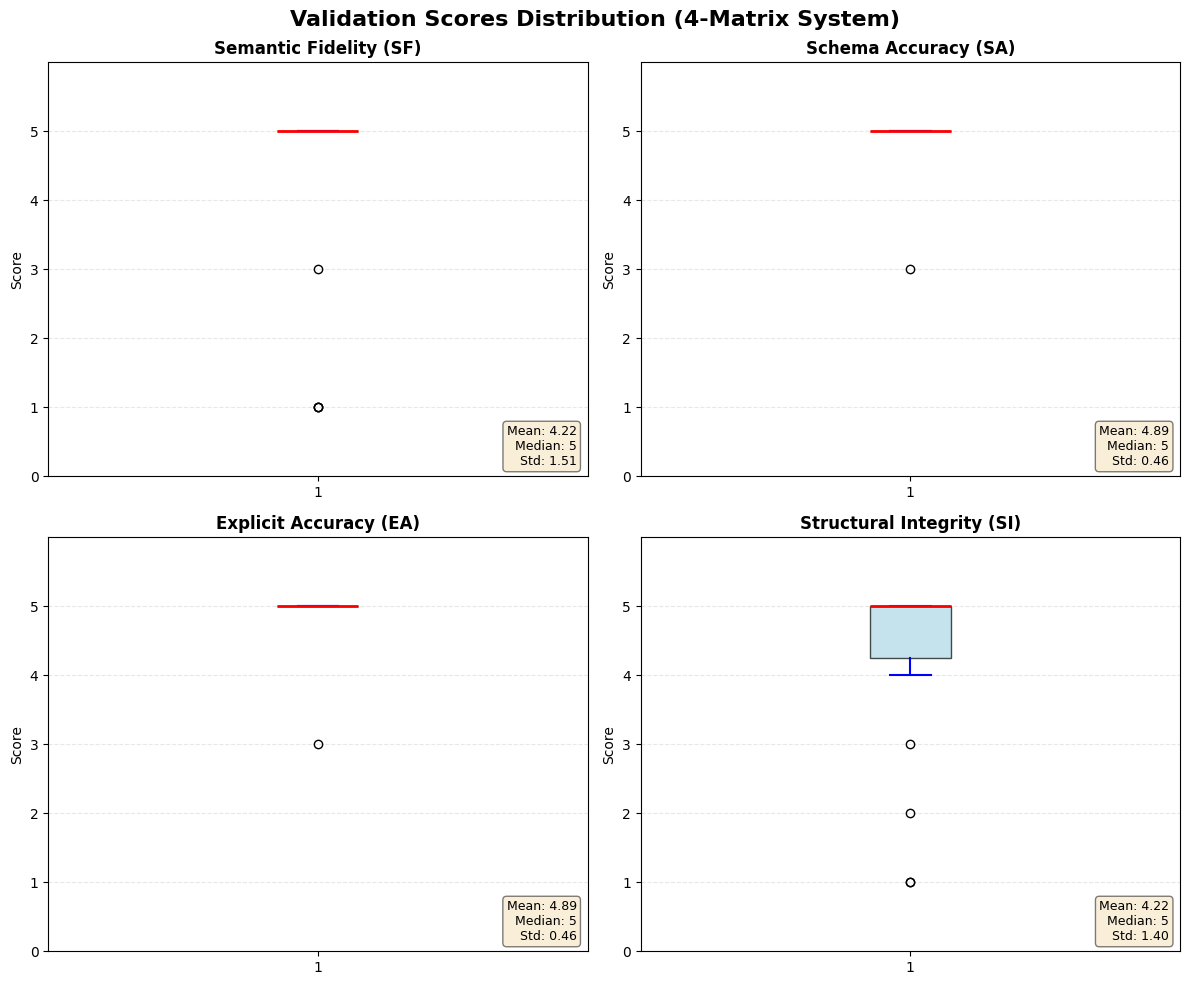

In [9]:
import matplotlib.pyplot as plt

# Create box plots for each score type
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Validation Scores Distribution (4-Matrix System)', fontsize=16, fontweight='bold')

score_data = [
    (all_sf, 'Semantic Fidelity (SF)', axes[0, 0]),
    (all_sa, 'Schema Accuracy (SA)', axes[0, 1]),
    (all_ea, 'Explicit Accuracy (EA)', axes[1, 0]),
    (all_si, 'Structural Integrity (SI)', axes[1, 1])
]

for scores, title, ax in score_data:
    bp = ax.boxplot(scores, vert=True, patch_artist=True, 
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='blue', linewidth=1.5),
                    capprops=dict(color='blue', linewidth=1.5))
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.set_ylim(0, 6)
    ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add statistics text
    mean_val = np.mean(scores)
    median_val = np.median(scores)
    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.0f}\nStd: {np.std(scores):.2f}'
    ax.text(0.98, 0.02, stats_text, transform=ax.transAxes, 
            fontsize=9, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

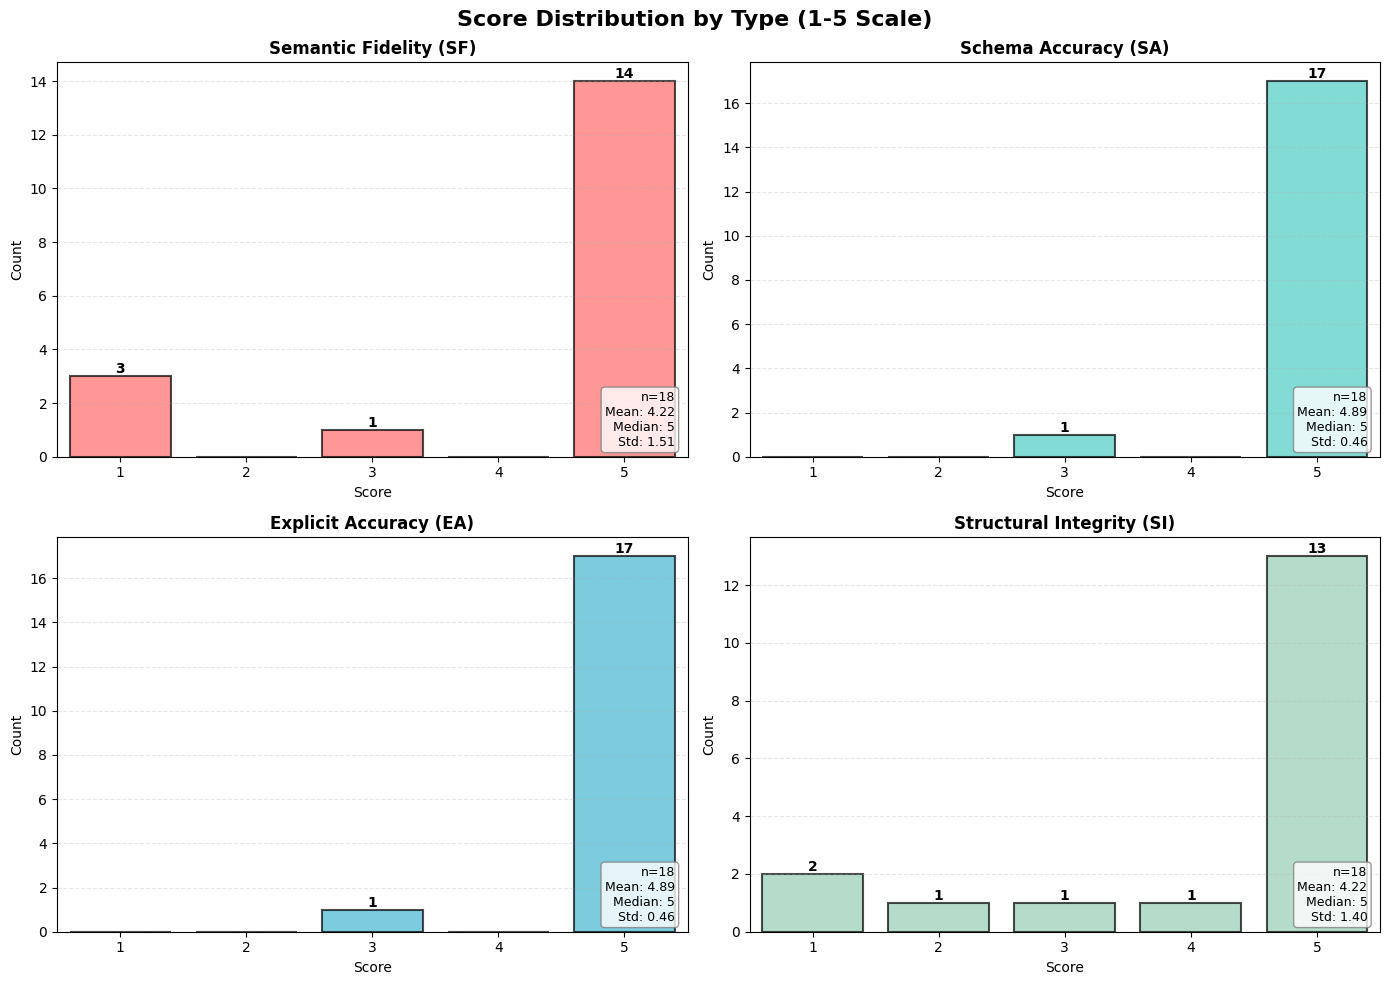

In [14]:
import matplotlib.pyplot as plt

# Create bar plots for each score type (1-5 distribution)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Score Distribution by Type (1-5 Scale)', fontsize=16, fontweight='bold')

score_data = [
    (all_sf, 'Semantic Fidelity (SF)', axes[0, 0], '#FF6B6B'),
    (all_sa, 'Schema Accuracy (SA)', axes[0, 1], '#4ECDC4'),
    (all_ea, 'Explicit Accuracy (EA)', axes[1, 0], '#45B7D1'),
    (all_si, 'Structural Integrity (SI)', axes[1, 1], '#96CEB4')
]

for scores, title, ax, color in score_data:
    # Count occurrences of each score (1-5)
    score_counts = pd.Series(scores).value_counts().sort_index()
    
    # Ensure all scores 1-5 are present, fill missing with 0
    all_scores_df = pd.Series({i: 0 for i in range(1, 6)})
    all_scores_df.update(score_counts)
    
    # Create bar plot
    bars = ax.bar(all_scores_df.index, all_scores_df.values, color=color, alpha=0.7, edgecolor='black', linewidth=1.5)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Score', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xlim(0.5, 5.5)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add statistics text - moved to bottom right
    mean_val = np.mean(scores)
    median_val = np.median(scores)
    total = len(scores)
    stats_text = f'n={total}\nMean: {mean_val:.2f}\nMedian: {median_val:.0f}\nStd: {np.std(scores):.2f}'
    ax.text(0.98, 0.02, stats_text, transform=ax.transAxes, 
            fontsize=9, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()